<a href="https://colab.research.google.com/github/NightPrinceY/CollegeForFun/blob/main/GENDER_DETECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gender-detect-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3969877%2F6912535%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240201%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240201T175028Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D763062a9e08d6684f2ff1165fd88a7d28ffe51fc1869b012eaf92fc8c4ee91ba2fdb293762a91225531a82937413081d1f9848a0e0cf49f4ed193e7eff8799247b4e001a18e2276eca203cda60e978295ac1e8d69440cbcfff77df0f10704ae50245028bfb67ad33de7f7d0a06be1c896a7efabb65fa1a2daa75ce1fa508e982073cd5196b8304c197a9e5407c138e803cdcb940c969d84f2055f02f81ef342d96c6ca44abb27c9f210e035dd89b172086752acc2d0afc92682173b45ed4548117859bbb8cf8dfb623d31813dfc186f0e58fa959791b566ffd019ec75c81f9870fa7d96dd2c912afecb9f098d03af35f64c17a9842b06203a8345509efd1600a,imagetest:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4387344%2F7532872%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240201%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240201T175028Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da357348ed7d0f3dc493899422eedd56a42cc1036bc6e612784b096aecd6dacecfb5e29bc29397e745c8996b7384eb45887da127172f26a7a639aef0e8503754cdf4e9af231c46e2695f75577873e9eb19df56bc4631130c18152389b2e20829882c30d1b098ecf4a27d46f11728bb60cac475c4b1d7f52fbc803d58603fdf8957f8c02d22f7262d6dbdb49f03c903e0f2fb0808cb03da79c53bdb90608f34c75ff61dae0bf7d847b3c2be8afefcb9f859b7fa69c2db5f72908b8651ac3a11156580e7acccc93a3e688f8191f6044d77703a123ebed7603b68e1c88587a520e800f3c6ff1aa22af6a94d7fa914fe4c985c2480860baf6e0a0dd58227c3e4b30a1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
base_dir = os.listdir("/kaggle/input/gender-detect-dataset/Gender - Detect")

#yahya show the content of dataset

base_dir


['validation', 'train']

In [ ]:
# show the content for each file in train and validation



base_dir = "/kaggle/input/gender-detect-dataset/Gender - Detect"

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['validation', 'train']

Contents of train directory:
['female', 'male']

Contents of validation directory:
['female', 'male']


In [ ]:
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

train_male_dir = os.path.join(train_dir , 'male')
train_female_dir = os.path.join(train_dir , 'female')


val_male_dir = os.path.join(validation_dir , 'male')
val_female_dir = os.path.join(validation_dir , 'female')






In [ ]:
train_male_fnames = os.listdir( train_male_dir )
train_female_fnames = os.listdir( train_female_dir )

print(train_male_fnames[:10])
print(train_female_fnames[:10])

['087801.jpg.jpg', '089850.jpg.jpg', '084393.jpg.jpg', '088503.jpg.jpg', '089240.jpg.jpg', '082526.jpg.jpg', '087490.jpg.jpg', '083968.jpg.jpg', '086782.jpg.jpg', '087411.jpg.jpg']
['117579.jpg.jpg', '118471.jpg.jpg', '119414.jpg.jpg', '115971.jpg.jpg', '120059.jpg.jpg', '121073.jpg.jpg', '119637.jpg.jpg', '116345.jpg.jpg', '116982.jpg.jpg', '119639.jpg.jpg']


In [ ]:
print('total training male images :', len(os.listdir(      train_male_dir ) ))
print('total training female images :', len(os.listdir(      train_female_dir ) ))

print('total validation male images :', len(os.listdir( val_male_dir ) ))
print('total validation female images :', len(os.listdir( val_female_dir ) ))

total training male images : 2000
total training female images : 2000
total validation male images : 500
total validation female images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 5 # Index for iterating over images

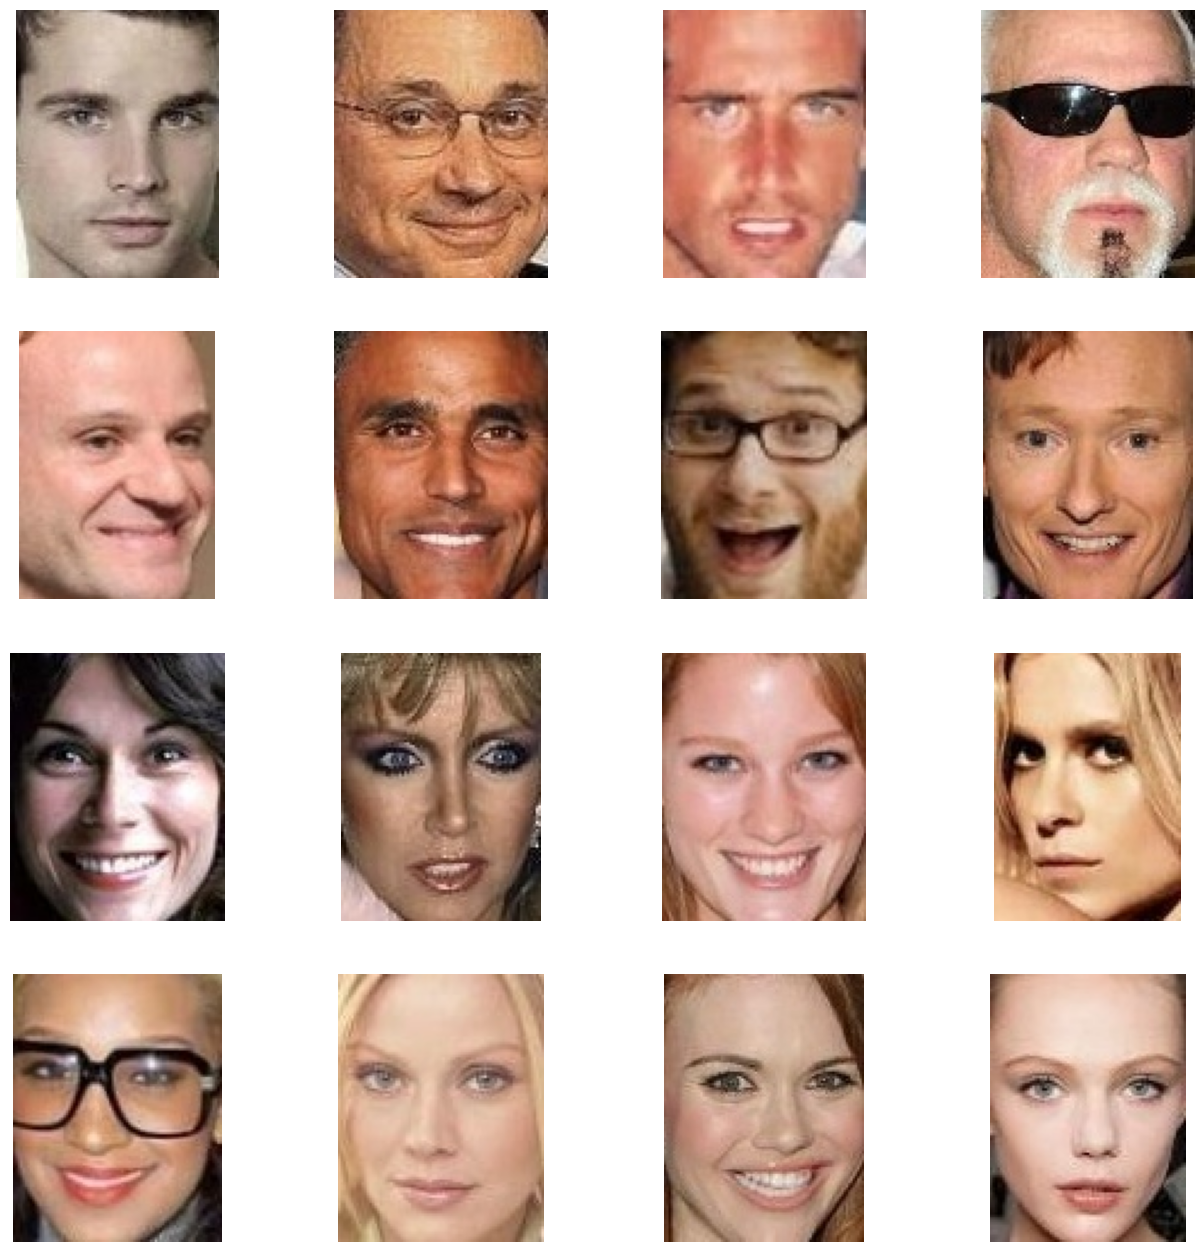

In [ ]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_male_dir, fname)
                for fname in train_male_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_female_dir, fname)
                for fname in train_female_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([

                                   tf.keras.layers.Conv2D(16,(3,3),activation = 'relu' , input_shape = (150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),

                                   tf.keras.layers.Flatten(),


                                   tf.keras.layers.Dense(units = 512 , activation = 'relu' ),
                                   tf.keras.layers.Dense(units = 1 , activation = 'sigmoid' ),


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop


model.compile(
              optimizer = RMSprop(learning_rate = 0.001),

              loss  =  'binary_crossentropy',

               metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen  = ImageDataGenerator(rescale = 1 /255)
validation_datagen  = ImageDataGenerator(rescale = 1 /255)


train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    batch_size = 20 ,
                                                    class_mode = 'binary',
                                                    target_size = (150,150) )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                  batch_size = 20 ,
                                                  class_mode = 'binary',
                                                  target_size = (150,150)

                                                 )





Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
class mycallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,ephoch, logs = {}):

        if(logs.get('loss') < 0.2 and logs.get('accuracy')> 92):

            print("\n Congratelation  you get the accuracy that you want !")

            self.model.stop_training = True


callbacks = mycallback()


In [ ]:
history = model.fit(
            train_generator,
            epochs=10,
            validation_data=validation_generator,
            verbose=2,
            callbacks = [callbacks]
            )

Epoch 1/10
200/200 - 58s - loss: 0.5468 - accuracy: 0.7145 - val_loss: 0.4260 - val_accuracy: 0.8000 - 58s/epoch - 290ms/step
Epoch 2/10
200/200 - 55s - loss: 0.3220 - accuracy: 0.8655 - val_loss: 0.2451 - val_accuracy: 0.9090 - 55s/epoch - 274ms/step
Epoch 3/10
200/200 - 54s - loss: 0.2402 - accuracy: 0.9038 - val_loss: 0.2973 - val_accuracy: 0.8800 - 54s/epoch - 270ms/step
Epoch 4/10
200/200 - 54s - loss: 0.1797 - accuracy: 0.9240 - val_loss: 0.2472 - val_accuracy: 0.8950 - 54s/epoch - 268ms/step
Epoch 5/10
200/200 - 53s - loss: 0.1455 - accuracy: 0.9408 - val_loss: 0.1881 - val_accuracy: 0.9330 - 53s/epoch - 263ms/step
Epoch 6/10
200/200 - 54s - loss: 0.1071 - accuracy: 0.9610 - val_loss: 0.2366 - val_accuracy: 0.9290 - 54s/epoch - 271ms/step
Epoch 7/10
200/200 - 55s - loss: 0.0868 - accuracy: 0.9668 - val_loss: 0.2067 - val_accuracy: 0.9320 - 55s/epoch - 273ms/step
Epoch 8/10
200/200 - 54s - loss: 0.0555 - accuracy: 0.9815 - val_loss: 0.2493 - val_accuracy: 0.9340 - 54s/epoch - 269

1/1 [==============================] - 0s 141ms/step
[0.9999922]
this person it's male !


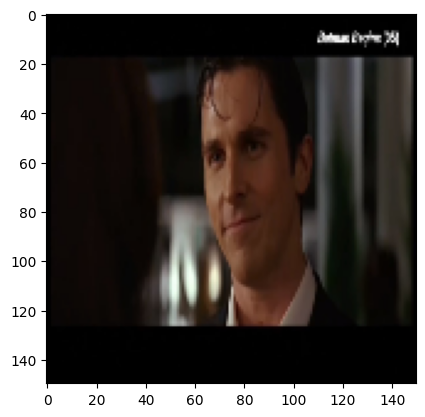

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array


path = "/kaggle/input/imagetest/WHO.jpg"


img = load_img(path, target_size=(150, 150))
plt.imshow(img)
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] > 0.5:
     print("this person it's male !")
else:
     print( "this person it's female !")